In [12]:
import pandas as pd

parallel_mode = []
avg_runtime = []
queries_per_sec = []
median_latency = []
p95_latency = []

filename = 'results/results-1024-64_2.txt'

with open(filename, 'r') as f:
    for line in f:
        if line.startswith('parallel_mode'):
            parallel_mode.append(int(line.split('=')[1].strip()))
        elif line.startswith('Average runtime'):
            avg_runtime.append(float(line.split(':')[1].strip().split(' ')[0]))
        elif line.startswith('Queries per second'):
            queries_per_sec.append(float(line.split(':')[1].strip()))
        elif line.startswith('Median latency'):
            median_latency.append(float(line.split(':')[1].strip().split(' ')[0]))
        elif line.startswith('95th percentile latency'):
            p95_latency.append(float(line.split(':')[1].strip().split(' ')[0]))

df = pd.DataFrame({
    'parallel_mode': parallel_mode,
    'average_runtime': avg_runtime,
    'queries_per_second': queries_per_sec,
    'median_latency': median_latency,
    '95th_percentile_latency': p95_latency
})

df

,parallel_mode,average_runtime,queries_per_second,median_latency,95th_percentile_latency
0,0,10.221,9783.666,5.294,6.760
1,0,9.898,10103.078,5.143,6.657
2,0,10.100,9901.426,5.282,6.691
3,1,27.343,3657.221,3.953,6.565
4,1,25.095,3984.882,3.898,6.095
5,1,27.433,3645.210,4.204,6.638
6,2,24.589,4066.866,4.399,7.089
7,2,23.376,4277.945,4.079,6.585
8,2,28.318,3531.311,4.361,6.973


In [13]:
mean_df = df.groupby('parallel_mode').mean()
mean_df


,average_runtime,queries_per_second,median_latency,95th_percentile_latency
parallel_mode,,,,
0,10.073000,9929.390000,5.239667,6.702667
1,26.623667,3762.437667,4.018333,6.432667
2,25.427667,3958.707333,4.279667,6.882333


In [1]:
import sys
sys.path.append('../../')
from evaluation_utils import *

baseline_file = 'results/results-1024.csv'
baseline_raw_df = pd.read_csv(baseline_file)
datatypes = {
    'n_probes': np.int32,
    'parallel_mode': np.int32,
    'run': np.int32,
    'queries_per_s': np.float32,
    'latency_50th': np.float32,
    'latency_95th': np.float32
}
for col, dtype in datatypes.items():
    baseline_raw_df[col] = baseline_raw_df[col].astype(dtype)

baseline_raw_df


,n_probes,parallel_mode,run,queries_per_s,latency_50th,latency_95th
0,1,0,0,286503.406250,0.000129,0.000188
1,1,0,1,290929.062500,0.000127,0.000247
2,1,0,2,321900.125000,0.000112,0.000159
3,1,1,0,104752.507812,0.000129,0.000309
4,1,1,1,150840.218750,0.000115,0.000162
...,...,...,...,...,...,...
67,128,1,1,3090.044922,0.008393,0.010928
68,128,1,2,1476.350830,0.008425,0.010503
69,128,2,0,2295.120850,0.008328,0.012597
70,128,2,1,2329.878174,0.008599,0.013217


In [2]:
# average over runs
baseline_mean_df = baseline_raw_df.groupby(['n_probes', 'parallel_mode']).mean().reset_index()
baseline_mean_df

,n_probes,parallel_mode,run,queries_per_s,latency_50th,latency_95th
0,1,0,1.0,299777.531250,0.000122,0.000198
1,1,1,1.0,136604.765625,0.000120,0.000211
2,1,2,1.0,278559.125000,0.000122,0.000209
3,2,0,1.0,190679.296875,0.000165,0.000252
4,2,1,1.0,45008.437500,0.000304,0.000476
5,2,2,1.0,180872.500000,0.000280,0.000402
6,4,0,1.0,94978.312500,0.000264,0.000373
7,4,1,1.0,37562.039062,0.000425,0.000626
8,4,2,1.0,68559.062500,0.000405,0.000656
9,8,0,1.0,58017.695312,0.000548,0.000767


In [3]:
baseline_std_df = baseline_raw_df.groupby(['n_probes', 'parallel_mode']).std().reset_index()
baseline_std_df


,n_probes,parallel_mode,run,queries_per_s,latency_50th,latency_95th
0,1,0,1.0,19286.095353,9.054676e-06,0.000045
1,1,1,1.0,27636.629101,8.400097e-06,0.000085
2,1,2,1.0,55747.674300,9.084968e-06,0.000061
3,2,0,1.0,13543.705673,6.264256e-06,0.000024
4,2,1,1.0,17943.815124,7.563295e-06,0.000100
5,2,2,1.0,37643.856252,8.838654e-06,0.000009
6,4,0,1.0,2188.220315,4.963078e-07,0.000004
7,4,1,1.0,2875.570770,8.259062e-07,0.000030
8,4,2,1.0,7775.107420,1.092571e-06,0.000025
9,8,0,1.0,7085.927855,1.177460e-05,0.000070


In [4]:
# merge baseline_mean_df and baseline_std_df
baseline_df = pd.merge(baseline_mean_df, baseline_std_df, on=['n_probes', 'parallel_mode'], suffixes=('', '_std'))
baseline_df

,n_probes,parallel_mode,run,queries_per_s,latency_50th,latency_95th,run_std,queries_per_s_std,latency_50th_std,latency_95th_std
0,1,0,1.0,299777.531250,0.000122,0.000198,1.0,19286.095353,9.054676e-06,0.000045
1,1,1,1.0,136604.765625,0.000120,0.000211,1.0,27636.629101,8.400097e-06,0.000085
2,1,2,1.0,278559.125000,0.000122,0.000209,1.0,55747.674300,9.084968e-06,0.000061
3,2,0,1.0,190679.296875,0.000165,0.000252,1.0,13543.705673,6.264256e-06,0.000024
4,2,1,1.0,45008.437500,0.000304,0.000476,1.0,17943.815124,7.563295e-06,0.000100
5,2,2,1.0,180872.500000,0.000280,0.000402,1.0,37643.856252,8.838654e-06,0.000009
6,4,0,1.0,94978.312500,0.000264,0.000373,1.0,2188.220315,4.963078e-07,0.000004
7,4,1,1.0,37562.039062,0.000425,0.000626,1.0,2875.570770,8.259062e-07,0.000030
8,4,2,1.0,68559.062500,0.000405,0.000656,1.0,7775.107420,1.092571e-06,0.000025
9,8,0,1.0,58017.695312,0.000548,0.000767,1.0,7085.927855,1.177460e-05,0.000070


In [5]:
throughput_file = '../../benchmarks/OpenMP PMODE 2/search.csv'
latency_file = '../../benchmarks/OpenMP PMODE 2/search_latency.csv'
throughput_df = pd.read_csv(throughput_file)
latency_df = pd.read_csv(latency_file)

throughput_df = throughput_df[throughput_df['n_lists'] == 1024]
throughput_df

,O,OMP_SCHEDULE,max_n_threads,INSERTION_STRATEGY,MAX_BUFFER_SIZE,n_lists,n_probes,n_results,time_s,s_per_query,...,vectors_per_s_std,queries_per_s_std,size_per_query_mb,mb_per_s,mb_per_s_std,size_mb,mb_per_s_speedup,mb_per_s_speedup_std,mb_per_s_speedup_vanilla,mb_per_s_speedup_vanilla_std
16,3,dynamic,32,dynamic,100,1024,1,10,0.102243,0.000010,...,11028.321113,110.283211,0.476837,46637.633697,52.587133,4768.371582,0.958205,0.001329,13.520045,0.015843
17,3,dynamic,32,dynamic,100,1024,2,10,0.197114,0.000020,...,6820.159681,68.201597,0.953674,48381.866149,65.042111,9536.743164,0.979276,0.004341,13.623791,0.018405
18,3,dynamic,32,dynamic,100,1024,4,10,0.385572,0.000039,...,6598.069068,65.980691,1.907349,49468.027575,125.848180,19073.486328,0.965755,0.002460,13.689635,0.045060
19,3,dynamic,32,dynamic,100,1024,8,10,0.753639,0.000075,...,1073.886172,10.738862,3.814697,50617.036348,40.965506,38146.972656,0.997988,0.001215,13.805682,0.021374
20,3,dynamic,32,dynamic,100,1024,16,10,1.487430,0.000149,...,207.814601,2.078146,7.629395,51292.461032,15.854996,76293.945312,0.999731,0.000575,13.653012,0.017367
21,3,dynamic,32,dynamic,100,1024,32,10,2.888320,0.000289,...,1598.318483,15.983185,15.258789,52829.288522,243.884046,152587.890625,1.008469,0.004727,13.787288,0.064452
22,3,dynamic,32,dynamic,100,1024,64,10,5.825690,0.000583,...,784.980812,7.849808,30.517578,52384.486859,239.557133,305175.781250,0.978356,0.006484,13.408300,0.061559
23,3,dynamic,32,dynamic,100,1024,128,10,11.370700,0.001137,...,1075.202796,10.752028,61.035156,53677.571522,656.251707,610351.562500,0.975586,0.012402,13.536810,0.165536


In [6]:
latency_df = latency_df[latency_df['n_lists'] == 1024]
latency_df

,O,OMP_SCHEDULE,max_n_threads,INSERTION_STRATEGY,MAX_BUFFER_SIZE,n_lists,n_probes,n_results,latency_50th,latency_50th_std,latency_95th,latency_95th_std,latency_99th,latency_99th_std,latency_95th_speedup,latency_95th_speedup_std,latency_95th_speedup_vanilla,latency_95th_speedup_vanilla_std
16,3,dynamic,32,dynamic,100,1024,1,10,0.000085,8.000000e-09,0.000131,2.530000e-07,0.000181,0.000002,1.009761,0.045848,1.661156,0.003454
17,3,dynamic,32,dynamic,100,1024,2,10,0.000102,6.870000e-07,0.000173,7.916000e-06,0.000222,0.000006,1.513296,0.069677,2.379501,0.109010
18,3,dynamic,32,dynamic,100,1024,4,10,0.000121,8.320000e-07,0.000225,1.911000e-06,0.000303,0.000006,2.159172,0.019917,3.607895,0.073127
19,3,dynamic,32,dynamic,100,1024,8,10,0.000168,3.265000e-06,0.000372,5.318000e-06,0.000499,0.000007,2.198239,0.237175,3.963769,0.072407
20,3,dynamic,32,dynamic,100,1024,16,10,0.000307,2.449000e-06,0.000536,7.517000e-06,0.000716,0.000014,2.674513,0.113072,5.099645,0.072001
21,3,dynamic,32,dynamic,100,1024,32,10,0.000919,3.618900e-05,0.001301,2.672700e-05,0.002835,0.001268,2.169089,0.184337,3.937571,0.081021
22,3,dynamic,32,dynamic,100,1024,64,10,0.001021,2.484800e-05,0.001439,5.369100e-05,0.003721,0.001442,3.153413,0.121813,6.640001,0.247778
23,3,dynamic,32,dynamic,100,1024,128,10,0.001391,2.509900e-05,0.001837,5.996500e-05,0.003202,0.001671,5.806713,0.200958,9.828857,0.320945


In [7]:
# merge throughput and latency
shared_columns = latency_df.columns.intersection(throughput_df.columns)
ours_df = pd.merge(throughput_df, latency_df, on=list(shared_columns))
ours_df


,O,OMP_SCHEDULE,max_n_threads,INSERTION_STRATEGY,MAX_BUFFER_SIZE,n_lists,n_probes,n_results,time_s,s_per_query,...,latency_50th,latency_50th_std,latency_95th,latency_95th_std,latency_99th,latency_99th_std,latency_95th_speedup,latency_95th_speedup_std,latency_95th_speedup_vanilla,latency_95th_speedup_vanilla_std
0,3,dynamic,32,dynamic,100,1024,1,10,0.102243,0.000010,...,0.000085,8.000000e-09,0.000131,2.530000e-07,0.000181,0.000002,1.009761,0.045848,1.661156,0.003454
1,3,dynamic,32,dynamic,100,1024,2,10,0.197114,0.000020,...,0.000102,6.870000e-07,0.000173,7.916000e-06,0.000222,0.000006,1.513296,0.069677,2.379501,0.109010
2,3,dynamic,32,dynamic,100,1024,4,10,0.385572,0.000039,...,0.000121,8.320000e-07,0.000225,1.911000e-06,0.000303,0.000006,2.159172,0.019917,3.607895,0.073127
3,3,dynamic,32,dynamic,100,1024,8,10,0.753639,0.000075,...,0.000168,3.265000e-06,0.000372,5.318000e-06,0.000499,0.000007,2.198239,0.237175,3.963769,0.072407
4,3,dynamic,32,dynamic,100,1024,16,10,1.487430,0.000149,...,0.000307,2.449000e-06,0.000536,7.517000e-06,0.000716,0.000014,2.674513,0.113072,5.099645,0.072001
5,3,dynamic,32,dynamic,100,1024,32,10,2.888320,0.000289,...,0.000919,3.618900e-05,0.001301,2.672700e-05,0.002835,0.001268,2.169089,0.184337,3.937571,0.081021
6,3,dynamic,32,dynamic,100,1024,64,10,5.825690,0.000583,...,0.001021,2.484800e-05,0.001439,5.369100e-05,0.003721,0.001442,3.153413,0.121813,6.640001,0.247778
7,3,dynamic,32,dynamic,100,1024,128,10,11.370700,0.001137,...,0.001391,2.509900e-05,0.001837,5.996500e-05,0.003202,0.001671,5.806713,0.200958,9.828857,0.320945


In [8]:
merged_df = pd.merge(baseline_df, ours_df, on=['n_probes'], suffixes=('_baseline', '_ours'))
merged_df

In [9]:
# compute speedup
merged_df['queries_per_s_baseline_speedup'] = merged_df['queries_per_s_ours'] / merged_df['queries_per_s_baseline']
merged_df['queries_per_s_baseline_speedup_std'] = merged_df['queries_per_s_baseline_speedup'] * np.sqrt((merged_df['queries_per_s_std_ours'] / merged_df['queries_per_s_ours'])**2 + (merged_df['queries_per_s_std_baseline'] / merged_df['queries_per_s_baseline'])**2)

# compute qps slow down
merged_df['queries_per_s_baseline_slowdown'] = merged_df['queries_per_s_baseline'] / merged_df['queries_per_s_ours']
merged_df['queries_per_s_baseline_slowdown_std'] = merged_df['queries_per_s_baseline_slowdown'] * np.sqrt((merged_df['queries_per_s_std_ours'] / merged_df['queries_per_s_ours'])**2 + (merged_df['queries_per_s_std_baseline'] / merged_df['queries_per_s_baseline'])**2)

merged_df['latency_95th_baseline_speedup'] = merged_df['latency_95th_baseline'] / merged_df['latency_95th_ours']
merged_df['latency_95th_baseline_speedup_std'] = merged_df['latency_95th_baseline_speedup'] * np.sqrt((merged_df['latency_95th_std_baseline'] / merged_df['latency_95th_baseline'])**2 + (merged_df['latency_95th_std_ours'] / merged_df['latency_95th_ours'])**2)

columns_to_display = ['n_probes', 'parallel_mode', 'queries_per_s_baseline', 'queries_per_s_ours', 'latency_50th_baseline', 'latency_50th_ours', 'latency_95th_baseline', 'latency_95th_ours', 'queries_per_s_baseline_speedup', 'latency_95th_baseline_speedup']
merged_df[columns_to_display]

,n_probes,parallel_mode,queries_per_s_baseline,queries_per_s_ours,latency_50th_baseline,latency_50th_ours,latency_95th_baseline,latency_95th_ours,queries_per_s_baseline_speedup,latency_95th_baseline_speedup
0,1,0,299777.531250,97806.206782,0.000122,0.000085,0.000198,0.000131,0.326263,1.515057
1,1,1,136604.765625,97806.206782,0.000120,0.000085,0.000211,0.000131,0.715979,1.615915
2,1,2,278559.125000,97806.206782,0.000122,0.000085,0.000209,0.000131,0.351115,1.598345
3,2,0,190679.296875,50732.063679,0.000165,0.000102,0.000252,0.000173,0.266060,1.457340
4,2,1,45008.437500,50732.063679,0.000304,0.000102,0.000476,0.000173,1.127168,2.753867
5,2,2,180872.500000,50732.063679,0.000280,0.000102,0.000402,0.000173,0.280485,2.323079
6,4,0,94978.312500,25935.493241,0.000264,0.000121,0.000373,0.000225,0.273068,1.658352
7,4,1,37562.039062,25935.493241,0.000425,0.000121,0.000626,0.000225,0.690471,2.785523
8,4,2,68559.062500,25935.493241,0.000405,0.000121,0.000656,0.000225,0.378294,2.922121
9,8,0,58017.695312,13268.952376,0.000548,0.000168,0.000767,0.000372,0.228705,2.065223


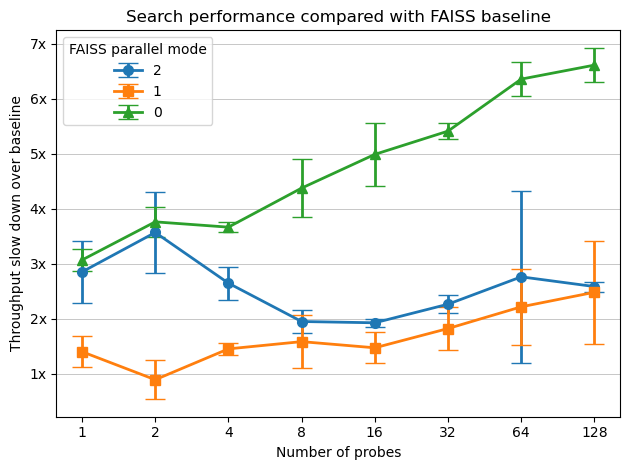

In [10]:
plot(df=merged_df, y_col='queries_per_s_baseline_slowdown', yerr_col='queries_per_s_baseline_slowdown_std', title='Search compared with FAISS baseline', subtitle='', ylabel='Throughput slow down over baseline', mode='parallel_mode', yformatter=speedup_formatter)

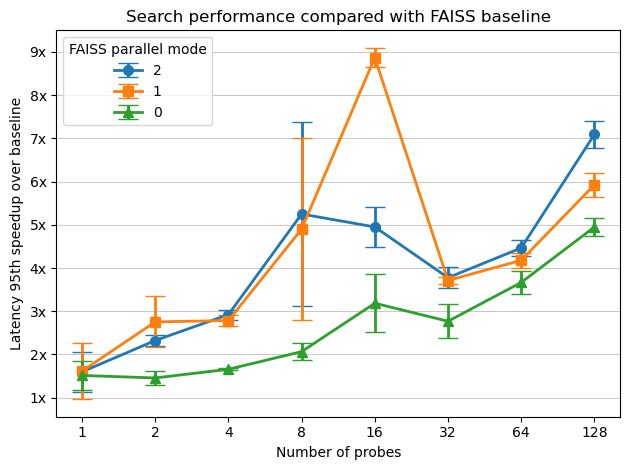

In [11]:
plot(df=merged_df, y_col='latency_95th_baseline_speedup', yerr_col='latency_95th_baseline_speedup_std', title='Search performance compared with FAISS baseline', subtitle='', ylabel='Latency 95th speedup over baseline', mode='parallel_mode', yformatter=speedup_formatter)